#### demo: Codes to recreate our results

In [1]:
import sys, os, gsw
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mldmtd import getProfileDataFromArgoNc

sys.path.append(os.path.abspath("../scripts"))
from buoyancy_potential_energy import buoyancy_potential_energy

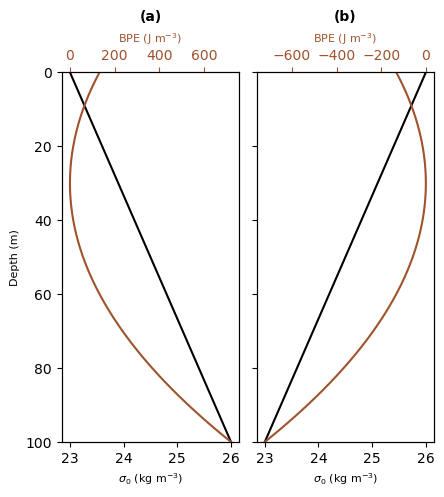

In [2]:
z = np.arange(-100,1,1)
den1 = np.flip(np.linspace(23,26,len(z)))
den2 = np.flip(np.linspace(26,23,len(z)))
den = [den1, den2]

### BPE computation
bpe1, z1 = buoyancy_potential_energy(den1, z, -30)
bpe2, z2 = buoyancy_potential_energy(den2, z, -30)
bpe = [bpe1, bpe2]

fig, axs = plt.subplots(1, 2, figsize=(4.8, 4.8))

for k in range(2):
    axs[k].plot(den[k], z*-1, c='black')
    axs[k].set_ylim(100, 0)
    axs[k].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)", fontsize=8)
    if k == 0:
        axs[k].set_ylabel(r"Depth (m)", fontsize=8)

    ax2 = axs[k].twiny()
    unit = r"z$_{ref}$"
    p1 = ax2.plot(bpe[k], z*-1, c="sienna")
    ax2.set_xlabel(r'BPE (J m$^{-3}$)', fontsize=8)
    ax2.set_ylim(100, 0)
    if k == 1:
        ax2.set_yticklabels([])
    ax2.xaxis.label.set_color(p1[0].get_color())
    ax2.tick_params(axis='x', colors=p1[0].get_color())

axs[0].text(0.5, 1.15, '(a)', fontweight='bold', fontsize=10, transform=axs[0].transAxes, va="center", ha="center")
axs[1].text(0.5, 1.15, '(b)', fontweight='bold', fontsize=10, transform=axs[1].transAxes, va="center", ha="center")

fig.subplots_adjust(wspace=0.10, hspace=0.33)

**Figure 1.**  Vertical profiles of potential density anomaly ($\sigma_0$) and BPE for an equilibrium depth at 30 m considering (a) a stably stratified and (b) an unstably stratified water column.

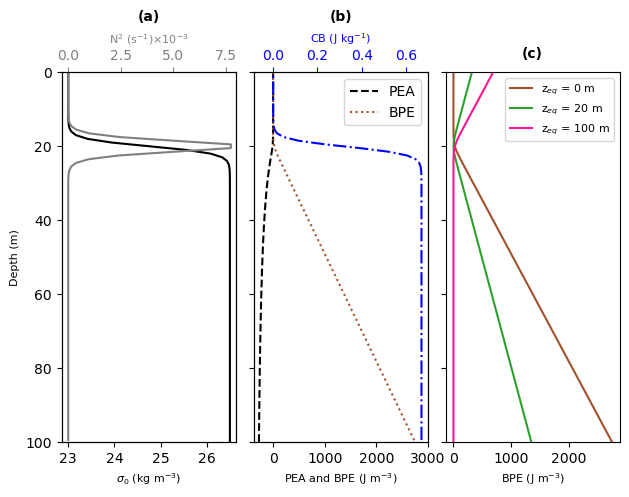

In [3]:
profile = scipy.io.loadmat('data/profile_ideal.mat')["ideal"]

z = profile["z"][0,0]
pot_rho = profile["pot_rho"][0,0]-1000
N2 = profile["N2"][0,0]
zN2 = profile["zN2"][0,0]
zint = profile["zint"][0,0]
APE = profile["APE"][0,0]
zAPE = profile["zAPE"][0,0]
CB = profile["CB"][0,0]
zCB = profile["zCB"][0,0]

### BPE computation
BPE1, zBPE1 = buoyancy_potential_energy(pot_rho.flatten(), z.flatten(), 0)
BPE2, zBPE2 = buoyancy_potential_energy(pot_rho.flatten(), z.flatten(), -20)
BPE3, zBPE3 = buoyancy_potential_energy(pot_rho.flatten(), z.flatten(), -100)
    
rho_min, rho_max = 22.95, 26.55
N2_min, N2_max = -0.0003, 0.008
rho_min, rho_max = 22.862, 26.638
CB_min, CB_max = -0.088, 0.7
BPE_min, BPE_max = -375,3000

fig, axs = plt.subplots(1, 3, figsize=(7.2, 4.8))

axs[0].plot(pot_rho, z*-1, c='black')
axs[0].set_xlim(rho_min, rho_max)
axs[0].set_ylim(100, 0)
axs[0].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)", fontsize=8)
axs[0].set_ylabel(r"Depth (m)", fontsize=8)

ax2 = axs[0].twiny()
p1 = ax2.plot(N2*1000, zN2*-1, c='gray')
ax2.set_xlim(N2_min*1000, N2_max*1000)
ax2.set_ylim(100, 0)
ax2.xaxis.label.set_color(p1[0].get_color())
ax2.set_xlabel(r"N$^2$ (s$^{-1}$)$\times 10^{-3}$", fontsize=8)
ax2.tick_params(axis='x', colors=p1[0].get_color())

unit = r"z$_{eq}$"
axs[2].plot(BPE1, zBPE1*-1, label=f"{unit} = {np.round(zint[0,0]*-1,1)} m", c="sienna")
axs[2].plot(BPE2, zBPE2*-1, label=f"{unit} = {np.round(zint[1,0]*-1,1)} m", c="tab:green")
axs[2].plot(BPE3, zBPE3*-1, label=f"{unit} = {np.round(zint[2,0]*-1,1)} m", c="deeppink")
axs[2].set_ylim(100, 0)
axs[2].set_yticklabels([])
axs[2].set_xlabel(r'BPE (J m$^{-3}$)', fontsize=8)
axs[2].legend(loc="upper right", prop = { "size": 8 })

p1 = axs[1].plot(APE, zAPE*-1, c='black', ls="--", label="PEA")
axs[1].plot(BPE1, zBPE1*-1, c='sienna', ls=":", label="BPE")
axs[1].set_xlim(BPE_min, BPE_max)
axs[1].set_ylim(100, 0)
axs[1].set_xlabel(r'PEA and BPE (J m$^{-3}$)', fontsize=8)
axs[1].xaxis.label.set_color(p1[0].get_color())
axs[1].tick_params(axis='x', colors=p1[0].get_color())
axs[1].legend(loc="upper right")

ax3 = axs[1].twiny()
p1 = ax3.plot(CB, zCB*-1, c='blue', ls="-.")
ax3.set_xlim(CB_min, CB_max)
ax3.set_ylim(100, 0)
ax3.set_yticklabels([])
ax3.xaxis.label.set_color(p1[0].get_color())
ax3.set_xlabel(r"CB (J kg$^{-1}$)", fontsize=8)
ax3.tick_params(axis='x', colors=p1[0].get_color())

axs[0].text(0.5, 1.15, '(a)', fontweight='bold', fontsize=10, transform=axs[0].transAxes, va="center", ha="center")
axs[1].text(0.5, 1.15, '(b)', fontweight='bold', fontsize=10, transform=axs[1].transAxes, va="center", ha="center")
axs[2].text(0.5, 1.05, '(c)', fontweight='bold', fontsize=10, transform=axs[2].transAxes, va="center", ha="center")

fig.subplots_adjust(wspace=0.10, hspace=0.35)

**Figure 2.** (a) Vertical profiles of potential density anomaly ($\sigma_0$) and buoyancy frequency ($N^2$) considering an idealized density profile. (b) Stratification intensity from the surface at different depths considering the BPE, PEA, and CB metrics. (c) BPE profiles considering different equilibrium depths.

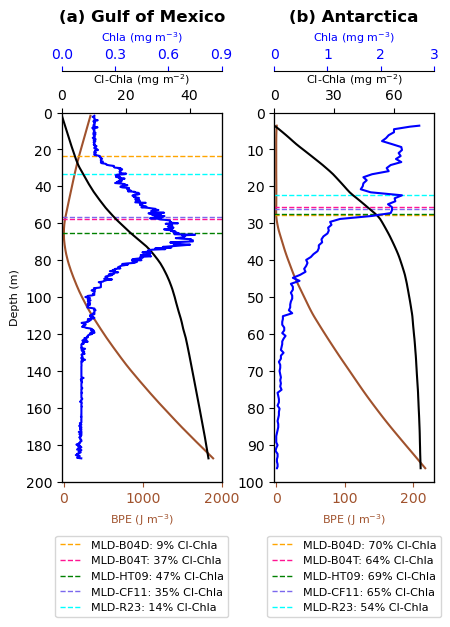

In [4]:
ymax = [200,100]
profiles = [
    scipy.io.loadmat('data/profile_GoM.mat')["gom"], 
    scipy.io.loadmat('data/profile_Antartida.mat')["ant"]
]

fig, axs = plt.subplots(1, 2, figsize=(6.4*0.75, 4.8*1))

for k in range(len(profiles)):
    z = profiles[k]["z"][0,0].flatten()
    CT = profiles[k]["CT"][0,0].flatten()
    SA = profiles[k]["SA"][0,0].flatten()
    pot_rho = profiles[k]["pot_rho"][0,0].flatten()
    MLD_CF11 = profiles[k]["MLD_CF11"][0,0].flatten()*-1

    chl = profiles[k]["chl"][0,0].flatten()
    chl_iv = profiles[k]["chl_iv"][0,0].flatten()
    chl_min, chl_max = 0, 0.9 if k == 0 else 3
    chl_iv_min, chl_iv_max = np.nanmin(chl_iv),50 if k == 0 else 80

    MLD_CF11 = profiles[k]["MLD_CF11"][0,0].flatten()*-1
    MLD_B04T = profiles[k]["MLD_B04T"][0,0].flatten()*-1
    MLD_B04D = profiles[k]["MLD_B04D"][0,0].flatten()*-1
    MLD_HT09 = profiles[k]["MLD_HT09"][0,0].flatten()*-1
    MLD_R23 = profiles[k]["MLD_R23"][0,0].flatten()*-1

    Pchl_CF11 = profiles[k]["Pchl_CF11"][0,0].flatten()
    Pchl_B04T = profiles[k]["Pchl_B04T"][0,0].flatten()
    Pchl_B04D = profiles[k]["Pchl_B04D"][0,0].flatten()
    Pchl_HT09 = profiles[k]["Pchl_HT09"][0,0].flatten()
    Pchl_R23 = profiles[k]["Pchl_R23"][0,0].flatten()

    df = pd.DataFrame({"z":z,"ctemp":CT,"asal":SA})
    df["rho"] = gsw.density.sigma0(df.asal, df.ctemp)
    
    aim = z[np.argmax(chl)]
    if k == 1:
        chl_aux = np.copy(chl)
        chl_aux[:20] = 0
        aim = z[np.argmax(chl_aux)]

    ### BPE computation
    BPE, z_BPE = buoyancy_potential_energy(np.flip(df.rho.values), np.flip(df.z.values), aim)
    if k == 0:
        BPE_min, BPE_max = -25, 2000
    else:
        BPE_min, BPE_max = -3, 230

    p1 = axs[k].plot(BPE, z_BPE*-1, c='sienna')
    axs[k].set_xlim(BPE_min, BPE_max)
    axs[k].set_ylim(ymax[k], 0)
    axs[k].set_xlabel(r"BPE (J m$^{-3}$)", fontsize=8)
    if k == 1:
        axs[k].set_yticks(np.arange(0,110,10))
    else:
        axs[k].set_yticks(np.arange(0,220,20))

    if k == 0:
        axs[k].set_ylabel(r"Depth (m)", fontsize=8)
    axs[k].xaxis.label.set_color(p1[0].get_color())
    axs[k].tick_params(axis='x', colors=p1[0].get_color())

    ax1 = axs[k].twiny()
    p1 = ax1.plot(chl_iv, z*-1, c='black')
    ax1.set_xlim(chl_iv_min, chl_iv_max)
    ax1.set_ylim(ymax[k], 0)
    ax1.set_xlabel(r"CI-Chla (mg m$^{-2}$)", fontsize=8)
    if k == 0:
        ax1.set_ylabel(r"Depth (m)", fontsize=8)
    else:
        ax1.set_xticks([0,30,60])
    ax1.xaxis.label.set_color(p1[0].get_color())
    ax1.tick_params(axis='x', colors=p1[0].get_color())

    ax2 = axs[k].twiny()
    p2 = ax2.plot(chl, z*-1, c='blue')
    if k == 0:
        ax2.set_xticks([0,0.3,0.6,0.9])	
    ax2.set_xlim(chl_min, chl_max)
    ax2.set_ylim(ymax[k], 0)
    ax2.set_xlabel(r"Chla (mg m$^{-3}$)", fontsize=8)
    ax2.spines['top'].set_position(('outward', 30))
    ax2.xaxis.label.set_color(p2[0].get_color())
    ax2.tick_params(axis='x', colors=p2[0].get_color())

    axs[k].plot([BPE_min, BPE_max], [MLD_B04D,MLD_B04D], c="orange", ls='--',lw=1, label=f'MLD-B04D: {int(np.round(Pchl_B04D[0],0))}% CI-Chla')
    axs[k].plot([BPE_min, BPE_max], [MLD_B04T,MLD_B04T], c="deeppink", ls='--',lw=1, label=f'MLD-B04T: {int(np.round(Pchl_B04T[0],0))}% CI-Chla')
    axs[k].plot([BPE_min, BPE_max], [MLD_HT09,MLD_HT09], c="green", ls='--',lw=1, label=f'MLD-HT09: {int(np.round(Pchl_HT09[0],0))}% CI-Chla')
    axs[k].plot([BPE_min, BPE_max], [MLD_CF11,MLD_CF11], c="mediumslateblue", ls='--',lw=1, label=f'MLD-CF11: {int(np.round(Pchl_CF11[0],0))}% CI-Chla')
    axs[k].plot([BPE_min, BPE_max], [MLD_R23,MLD_R23], c="cyan", ls='--',lw=1,   label=f'MLD-R23: {int(np.round(Pchl_R23[0],0))}% CI-Chla')
    axs[k].legend(loc="lower center",  bbox_to_anchor=(0.5, -0.38), prop = { "size": 8 })

axs[0].set_title('(a) Gulf of Mexico', fontweight='bold')
axs[1].set_title('(b) Antarctica', fontweight='bold')

fig.subplots_adjust(wspace=0.33, hspace=0.35)

**Figure 3.** Vertical profiles of Chla and vertical column-integrated Chla (CI-Chla) in (a) the Gulf of Mexico (92.41°W, 21.90°N on November 8, 2015) and (b) Antarctica (68.84°W, 67.86°S on January 27, 2009). The CI-Chla percentage at different MLD estimates is shown, considering that the percentage increases from the shallowest to the deepest record. The BPE profiles are shown, considering the subsurface maxima of Chla (66 m for the Gulf of Mexico and 22 m for Antarctica) as the reference depths.

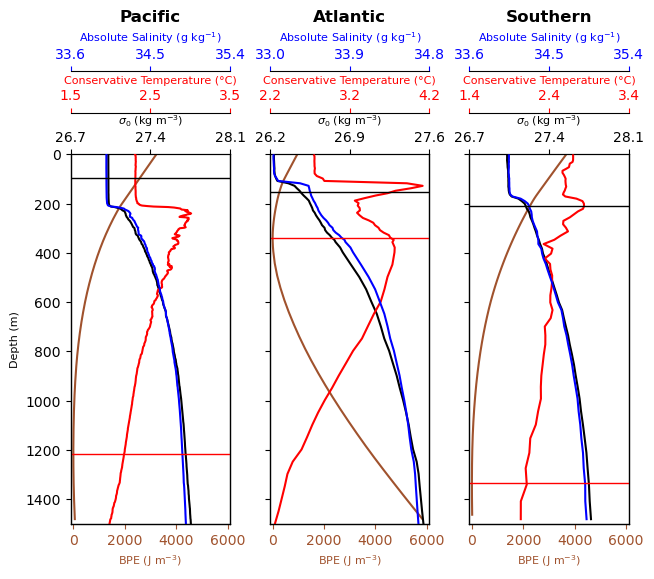

In [5]:
files = [
    "D5902383_018.nc",
    "D4901119_048.nc",
    "D1900973_021.nc",
]
mld_idl = np.load("data/mld_idl.npy")

fig, axs = plt.subplots(1, 3, figsize=(7.2, 4.8))

for k in range(3):
    df = getProfileDataFromArgoNc(f"data/{files[k]}")
    df = df[["date","latitude","longitude","pres","asal","ctemp"]]
    df = df[(df.pres <= 1500)]
    df["rho"] = gsw.density.sigma0(df.asal, df.ctemp)
    df["z"] = gsw.z_from_p(df["pres"].values,df["latitude"].values)

    rho_common = 0.7
    ctemp_common = 1
    asal_common = 0.88
    ctemp_min, ctemp_max = df.ctemp.min(), df.ctemp.max()
    asal_min, asal_max = df.asal.min(), df.asal.max()
    rho_min, rho_max = df.rho.min(), df.rho.max()
    rho_center = np.round((rho_min+rho_max)/2,1)
    rho_min, rho_max = rho_center-rho_common, rho_center+rho_common
    ctemp_center = np.round((ctemp_min+ctemp_max)/2,1)
    ctemp_min, ctemp_max = ctemp_center-ctemp_common, ctemp_center+ctemp_common
    asal_center = np.round((asal_min+asal_max)/2,1)
    asal_min, asal_max = asal_center-asal_common, asal_center+asal_common

    ### BPE computation
    BPE, z_BPE = buoyancy_potential_energy(np.flip(df.rho.values), np.flip(df.z.values), -mld_idl[k][1])
    bpe = scipy.interpolate.interp1d(np.flip(z_BPE),np.flip(BPE))
    mbl = bpe(-mld_idl[k][0])
    BPE_min, BPE_max = -100, 6100

    p2 = axs[k].plot(BPE, z_BPE*-1, c="sienna")
    axs[k].set_xticks([0,2000,4000,6000])
    axs[k].set_xlim(BPE_min, BPE_max)
    axs[k].set_ylim(1500, 0)
    axs[k].set_xlabel(r'BPE (J m$^{-3}$)', fontsize=8)
    if k != 0:
        axs[k].set_yticklabels([])
    else:
        axs[k].set_ylabel(r"Depth (m)", fontsize=8)

    ax2 = axs[k].twiny()
    ax2.plot(df.rho.values, df.pres.values, c='black')
    ax2.set_xticks([rho_min, (rho_min+rho_max)/2, rho_max], ["{:.1f}".format(rho_min), "{:.1f}".format((rho_min+rho_max)/2), "{:.1f}".format(rho_max)])
    ax2.set_xlim(rho_min, rho_max)
    ax2.set_ylim(1500, 0)
    ax2.set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)", fontsize=8)

    ax3 = axs[k].twiny()
    p3 = ax3.plot(df.ctemp.values, df.pres.values, c="red")
    ax3.set_ylim(1500, 0)
    ax3.set_xticks([ctemp_min, (ctemp_min+ctemp_max)/2, ctemp_max], ["{:.1f}".format(ctemp_min), "{:.1f}".format((ctemp_min+ctemp_max)/2), "{:.1f}".format(ctemp_max)])
    ax3.set_xlim(ctemp_min, ctemp_max)
    ax3.set_xlabel("Conservative Temperature (°C)", fontsize=8)
    ax3.spines['top'].set_position(('outward', 30))

    ax4 = axs[k].twiny()
    p4 = ax4.plot(df.asal.values, df.pres.values, c="blue")
    ax4.set_ylim(1500, 0)
    ax4.set_xticks([asal_min, (asal_min+asal_max)/2, asal_max], ["{:.1f}".format(asal_min), "{:.1f}".format((asal_min+asal_max)/2), "{:.1f}".format(asal_max)])
    ax4.set_xlim(asal_min, asal_max)
    ax4.plot([BPE_min, BPE_max], [mld_idl[k][0], mld_idl[k][0]], ls='-',lw=1, color="black", label=f'MLD ({np.round(mld_idl[k][0],1)} m)')
    ax4.plot([BPE_min, BPE_max], [mld_idl[k][1], mld_idl[k][1]], ls='-',lw=1, color="red", label=f'ILD ({np.round(mld_idl[k][1],1)} m)')
    ax4.set_xlabel(r'Absolute Salinity (g kg$^{-1}$)', fontsize=8)
    ax4.spines['top'].set_position(('outward', 60))

    axs[k].xaxis.label.set_color(p2[0].get_color())
    ax3.xaxis.label.set_color(p3[0].get_color())
    ax4.xaxis.label.set_color(p4[0].get_color())
    axs[k].tick_params(axis='x', colors=p2[0].get_color())
    ax3.tick_params(axis='x', colors=p3[0].get_color())
    ax4.tick_params(axis='x', colors=p4[0].get_color())

axs[0].set_title('Pacific', fontweight='bold')
axs[1].set_title('Atlantic', fontweight='bold')
axs[2].set_title('Southern', fontweight='bold')

fig.subplots_adjust(wspace=0.25, hspace=0.35)

**Figure 4.** Profiles of barrier layers measured in the Pacific (179.899°W, 60.288°N on January 19, 2011), Atlantic (20.482°W, 51.418°S on October 6, 2009), and Southern (178.228°W, 60.904°S on June 25, 2015) Oceans. The BPE profiles are also shown, considering the ILD as the reference depth; the stratification intensity of the barrier layer is determined by the BPE value at the MLD.